<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week06/bagged_trees_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

In [3]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT0FIRn2egZAbuMtgzhPBEP9QNmQ85zcqJ4EBmmX5XR07qdhTlbywXX6_2LVeBBcoSPUiJ-uht80t0r/pub?output=csv'
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [7]:
# Explore the data
print('There are', df.duplicated().sum(), 'duplicates in the data set.')
print('There are', df.isna().sum().sum(), 'missing values in the data set.')
df.info()

There are 0 duplicates in the data set.
There are 0 missing values in the data set.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [9]:
# Set the features and target
X = df.drop(columns = 'MedHouseVal')
y = df['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
# Instantiate the model
bag_reg = BaggingRegressor(random_state = 42)

In [14]:
bag_reg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [16]:
# Train the model
bag_reg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [19]:
# Make predictions with the model
bag_reg.predict(X_test)

array([0.5058  , 0.6723  , 4.908308, ..., 1.057   , 2.9243  , 4.2562  ])

In [22]:
# Evaluate the model
bag_reg_train_score = bag_reg.score(X_train, y_train)
bag_reg_test_score = bag_reg.score(X_test, y_test)

print(bag_reg_train_score)
print(bag_reg_test_score)

0.9612123478289769
0.7893591786740191


In [34]:
# Tune the model
estimators = list(range(10, 60, 10)) + [100]
scores = pd.DataFrame(index = estimators, columns = ['Train Score', 'Test Score'])
for estimator in estimators:
  bag_reg = BaggingRegressor(n_estimators = estimator, random_state = 42)
  bag_reg.fit(X_train, y_train)
  scores.loc[estimator, 'Train Score'] = bag_reg.score(X_train, y_train)
  scores.loc[estimator, 'Test Score'] = bag_reg.score(X_test, y_test)

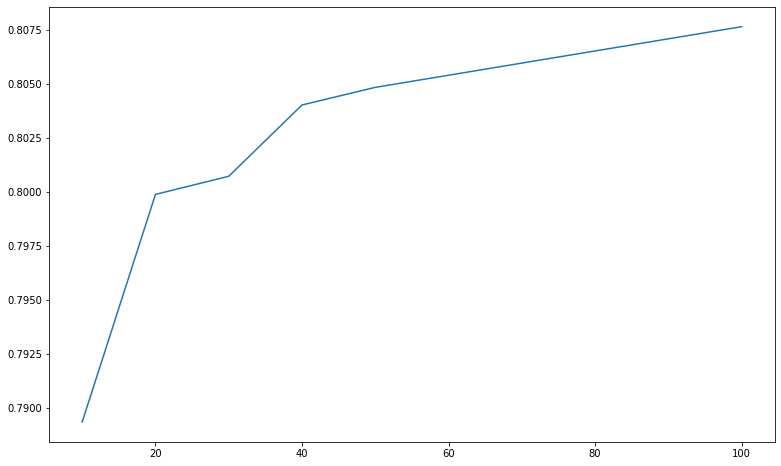

In [38]:
# Determine which values to use for n_estimators
plt.figure(figsize = (13, 8))
plt.plot(scores['Test Score'])

scores = scores.sort_values(by = 'Test Score', ascending = False)

In [40]:
# Build the tuned model
best_n_estimator = scores.index[0]
bag_reg_tuned = BaggingRegressor(n_estimators = best_n_estimator, random_state = 42)
bag_reg_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=42)